# TBmodels

## Setup

In [1]:
%%capture
%%bash
pip install tbmodels

In [2]:
import tbmodels

## Load model from Wannier90 output

In [3]:
tbmodels.Model.from_wannier_folder?

In [4]:
tbmodels.Model.from_wannier_files?

In [5]:
model = tbmodels.Model.from_wannier_folder(folder='wannier_output', prefix='wannier90', pos_kind='nearest_atom')

The model can be used to directly evaluate the Hamiltonian or bandstructure at a given k-point (in reduced coordinates):

In [6]:
model.hamilton((0.1, 0.2, 0.3))

array([[ 5.81990767e+00+0.00000000e+00j, -1.28824130e+00-6.98955814e-01j,
        -6.57383632e-01-3.92270975e-01j, -1.01854039e-01-5.73982359e-01j,
         4.40077575e-01+2.31553801e+00j, -2.47648498e+00-7.56738913e-01j,
        -2.18344778e+00-9.30716482e-01j, -2.70417857e+00-1.45810426e+00j,
         1.65154422e-04-8.30537220e-05j, -6.26585374e-03+6.45911467e-05j,
         1.13884853e-03+6.11011299e-03j,  4.69401989e-03-7.18881076e-03j,
         2.98288032e-04-1.67341303e-03j,  6.71297648e-04-2.19644875e-03j,
        -1.85336157e-03-1.00889337e-03j,  1.46046705e-03+1.54810045e-03j],
       [-1.28824130e+00+6.98955814e-01j,  6.24869978e+00+0.00000000e+00j,
        -1.36611786e+00+5.30755275e-02j, -6.55580687e-01-3.79825990e-01j,
        -1.51464088e+00+1.84293326e+00j,  6.18206659e-01+6.35020627e-01j,
        -1.70089133e+00+1.08092710e+00j, -2.40661963e+00+8.08188005e-01j,
         5.46152625e-03+9.15804485e-04j, -2.26513000e-04-1.62634024e-04j,
        -6.85619032e-03-6.63339206e-0

In [7]:
model.eigenval((0.1, 0.2, 0.3))

array([-4.90308606, -4.90305245,  2.86115502,  2.86116788,  4.16117677,
        4.16120036,  5.26826187,  5.2682822 ,  8.61672255,  8.61676031,
        9.98343812,  9.98345273, 10.96337749, 10.96342905, 11.32361416,
       11.32365939])

### Plot bandstructure with bands-inspect

In [8]:
%%capture
%%bash
pip install bands-inspect

In [9]:
import bands_inspect as bi

In [10]:
kpts_path = bi.kpoints.KpointsPath(
    paths=[[r'$\Gamma$', 'X', 'U'], ['K', r'$\Gamma$', 'L', 'W', 'X']],
    special_points={
        r'$\Gamma$': (0, 0, 0),
        'X': (0.5, 0, 0.5),
        'U': (0.625, 0.25, 0.625),
        'K': (0.375, 0.375, 0.75),
        'L': (0.5, 0.5, 0.5),
        'W': (0.5, 0.25, 0.75),
    },
    unit_cell=model.uc,
    kpoint_distance=0.01)

In [11]:
eigenvals = bi.eigenvals.EigenvalsData.from_eigenval_function(
    kpoints=kpts_path,
    eigenval_function=model.eigenval
)

<IPython.core.display.Javascript object>


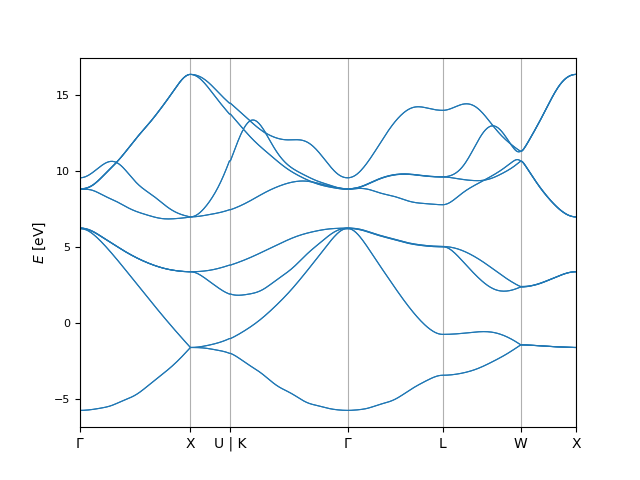

In [24]:
%matplotlib notebook
bi.plot.eigenvals(eigenvals);

## Symmetrization

In [13]:
import symmetry_representation as sr

In [14]:
symmetry_group = sr.io.load('symmetries.hdf5')

/home/greschd/.virtualenvs/tools_intro/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [15]:
model_symm = model.symmetrize(symmetry_group.symmetries, full_group=symmetry_group.full_group)

### Comparison of band structures

In [16]:
eigenvals_symm = bi.eigenvals.EigenvalsData.from_eigenval_function(
    kpoints=kpts_path,
    eigenval_function=model_symm.eigenval
)

<IPython.core.display.Javascript object>


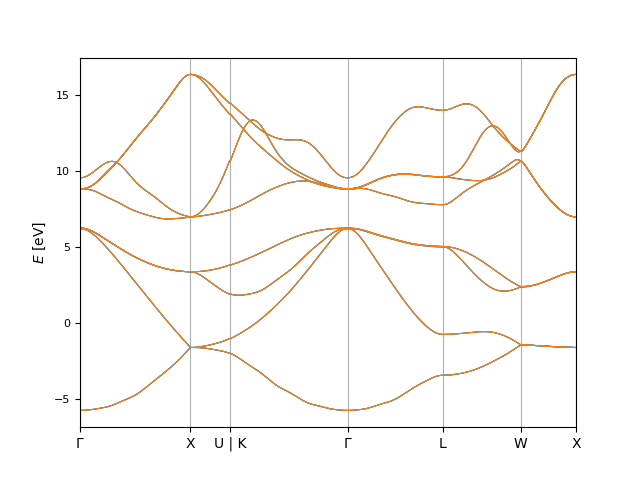

In [25]:
%matplotlib notebook
fig = bi.plot.eigenvals(eigenvals)
bi.plot.eigenvals(eigenvals_symm, ax=fig.gca(), plot_options=dict(color='C1', lw=0.6))

## Create k.p model

In [18]:
model.construct_kdotp?

In [35]:
kp_model = model.construct_kdotp(k=(0, 0, 0), order=2)

### Compare band structures

In [36]:
eigenvals_kp = bi.eigenvals.EigenvalsData.from_eigenval_function(
    kpoints=kpts_path,
    eigenval_function=kp_model.eigenval
)

In [37]:
kp_model.eigenval((0, 0, 0))

array([-5.74263139, -5.74262186,  6.21206569,  6.21207289,  6.25909606,
        6.25910078,  6.25910527,  6.25910906,  8.80451686,  8.80452023,
        8.83906923,  8.83907362,  8.83907975,  8.83908456,  9.56537577,
        9.56538949])

In [38]:
model.eigenval((0, 0, 0))

array([-5.74263139, -5.74262186,  6.21206569,  6.21207289,  6.25909606,
        6.25910078,  6.25910527,  6.25910906,  8.80451686,  8.80452023,
        8.83906923,  8.83907362,  8.83907975,  8.83908456,  9.56537577,
        9.56538949])

<IPython.core.display.Javascript object>


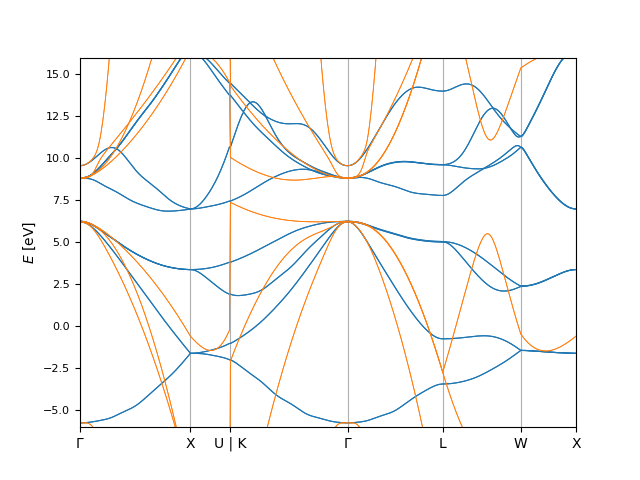

(-6, 16)

In [39]:
%matplotlib notebook
fig = bi.plot.eigenvals(eigenvals)
ax = fig.gca()
bi.plot.eigenvals(eigenvals_kp, ax=ax, plot_options=dict(color='C1', lw=0.6))
ax.set_ylim((-6, 16))